<a href="https://colab.research.google.com/github/shristabaruah/Image_class_classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu May  6 16:43:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')


In [3]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
img_height ,img_width =150,150
train_data_dir ='/content/drive/MyDrive/dataset/dataset/dataset'
validation_data_dir ='/content/drive/MyDrive/dataset/dataset/dataset'
batch_size = 9

In [12]:
#data_augmentation

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split = 0.2
    
)
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size,
    subset ="training",
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale =1./255)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size,
    subset ="validation",
    class_mode="categorical"
)

Found 81 images belonging to 5 classes.
Found 20 images belonging to 5 classes.


In [15]:
activation = 'relu'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.3))

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)       

In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 9,
        epochs = 10,
        validation_data = validation_generator,
        validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
9/9 [==============================] - 5s 446ms/step - loss: 56.3967 - accuracy: 0.1790 - val_loss: 4.7738 - val_accuracy: 0.2222
Epoch 2/10
9/9 [==============================] - 3s 392ms/step - loss: 18.4214 - accuracy: 0.3057 - val_loss: 8.6456 - val_accuracy: 0.1667
Epoch 3/10
9/9 [==============================] - 3s 382ms/step - loss: 12.1399 - accuracy: 0.4960 - val_loss: 17.2314 - val_accuracy: 0.1111
Epoch 4/10
9/9 [==============================] - 3s 360ms/step - loss: 16.8059 - accuracy: 0.3920 - val_loss: 12.7655 - val_accuracy: 0.1667
Epoch 5/10
9/9 [==============================] - 3s 392ms/step - loss: 9.8963 - accuracy: 0.4575 - val_loss: 18.3954 - val_accuracy: 0.2222
Epoch 6/10
9/9 [==============================] - 3s 396ms/step - loss: 6.3131 - accuracy: 0.5329 - val_loss: 16.6502 - val_accuracy: 0.2222
Epoch 7/10
9/9 [==============================] - 3s 389ms/step - loss: 6.4390 - accuracy: 0.4925 - val_loss: 14.4187 - val_accuracy: 0.1667
Epoch 8/10


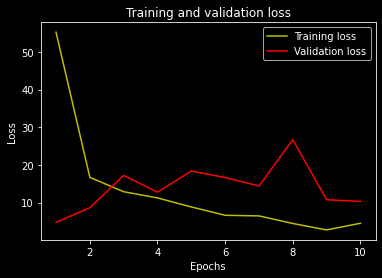

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

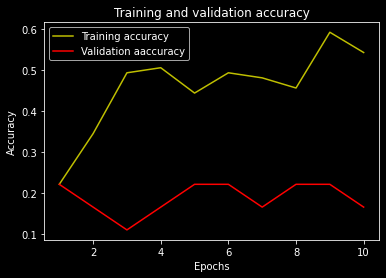

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation aaccuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()